# Project: Concrete Strength Prediction

#### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split as tts

from IPython.core.interactiveshell import InteractiveShell

# Typically would use inline
# but doing this for a 3d chart
# in the bivariate analysis section
%matplotlib inline

InteractiveShell.ast_node_interactivity = 'all'

plt.rc('figure', max_open_warning=0)

#### Set package options

In [2]:
sns.set(color_codes=True)
sns.set_style(style='darkgrid')
palette = 'Set2'
pd.set_option('display.max_columns', None)

#### Import dataset; one for raw data, one to edited/imputed data 

In [3]:
raw_data = pd.read_csv('concrete.csv')
data = pd.read_csv('concrete.csv')

#### Methods for use elsewhere

In [4]:
figx = 10
figy = 8

def dist(col):
    plt.figure(figsize=(figx,figy))
    sns.distplot(col);
    
def hist(col):
    plt.figure(figsize=(figx,figy))
    plt.hist(col)
    plt.axvline(col.mean(), color='y', linewidth=2, label='Mean')
    plt.axvline(col.median(), color='g', linewidth=2, label='Median')
    plt.legend();
    
def box(col):
    plt.figure(figsize=(figx,figy))
    sns.boxplot(col);
    
def print_summary(col):
    dist(col)
    hist(col)
    box(col)
    print(col.describe())
    print('')
    print('Unique values: ' + str(col.nunique()))
    
def replace_zeros(col, val):
    data[col].replace(0, val, inplace=True)
    
def marginal_boxplot_margins(a, vertical=False, **kws):
    if vertical:
        sns.boxplot(y=a, palette='Accent', **kws)
    else:
        sns.boxplot(x=a, palette='Accent_r', **kws)

def marginal_boxplot(xcol, ycol, raw=True):
    if raw:
        g = sns.JointGrid(data=raw_data, x=xcol, y=ycol);
    else:
        g = sns.JointGrid(data=data, x=xcol, y=ycol);
    g.plot_joint(sns.regplot, lowess=True, truncate=False, scatter_kws={'alpha':.2});
    g.plot_marginals(marginal_boxplot_margins);

## Generic data analysis

In [5]:
raw_data.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [6]:
raw_data.shape

(1030, 9)

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
raw_data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## Univariate analysis

### Cement (cement)

count    1030.000000
mean      281.167864
std       104.506364
min       102.000000
25%       192.375000
50%       272.900000
75%       350.000000
max       540.000000
Name: cement, dtype: float64

Unique values: 278


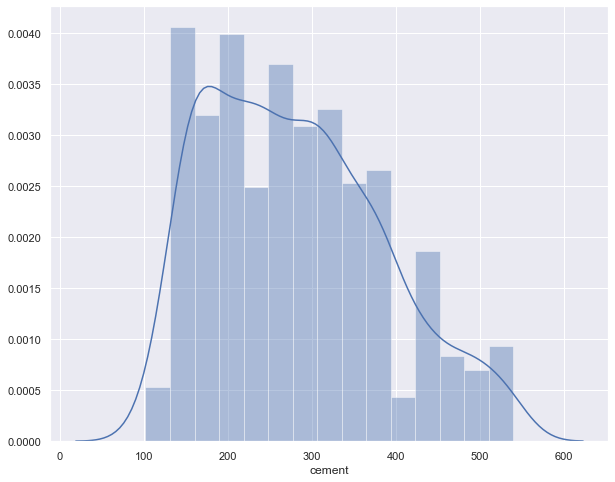

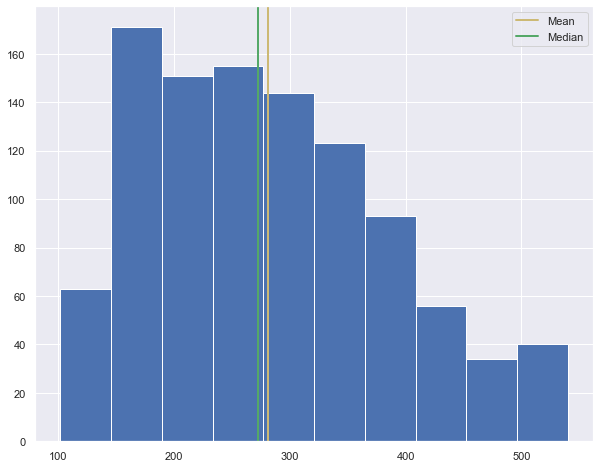

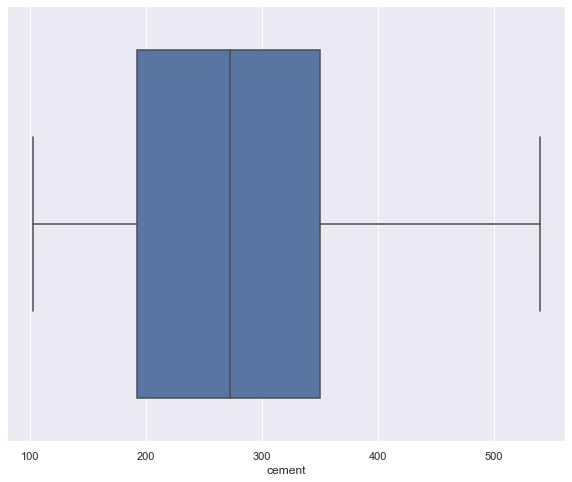

In [9]:
print_summary(raw_data['cement'])

Distribution of `cement` has a very slight right-hand skew.

### Blast Furance Slag (slag)

count    1030.000000
mean       73.895825
std        86.279342
min         0.000000
25%         0.000000
50%        22.000000
75%       142.950000
max       359.400000
Name: slag, dtype: float64

Unique values: 185


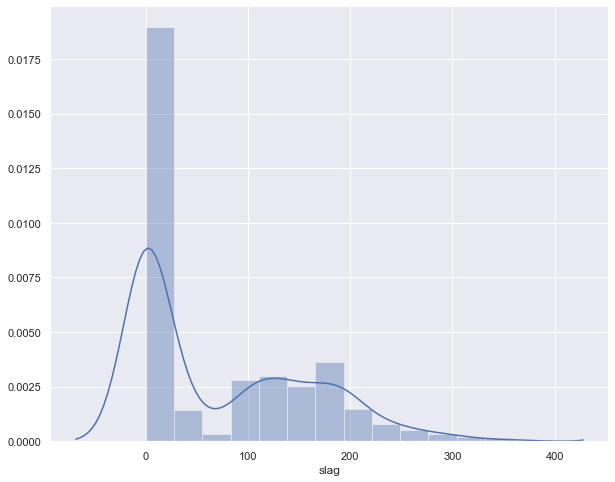

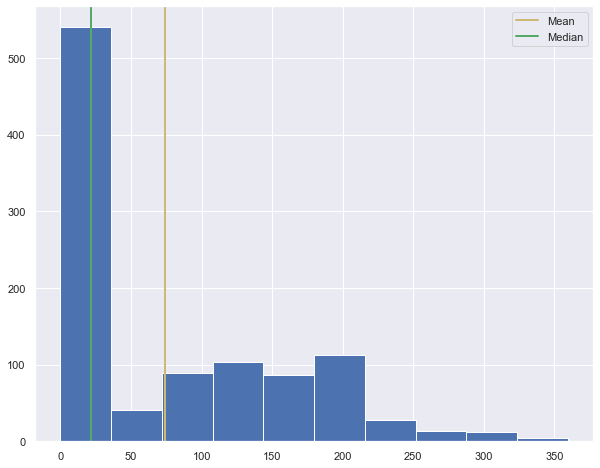

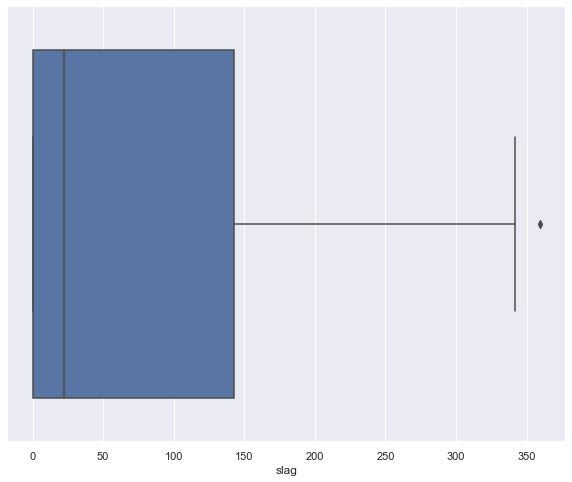

In [10]:
print_summary(raw_data['slag'])

count    559.000000
mean     136.158676
std       72.351823
min       11.000000
25%       95.000000
50%      135.700000
75%      189.000000
max      359.400000
Name: slag, dtype: float64

Unique values: 184


/Users/phil/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/phil/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


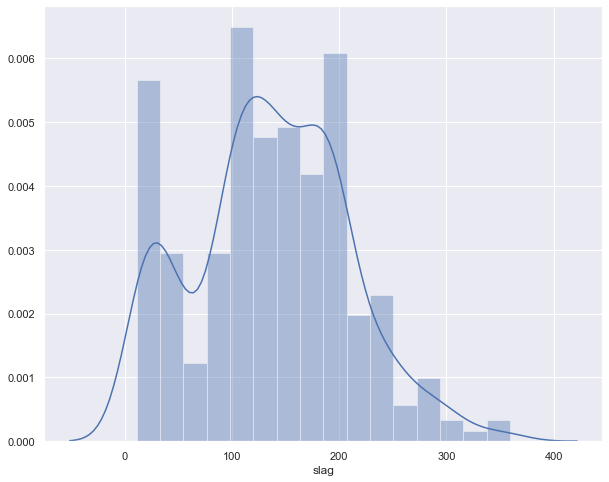

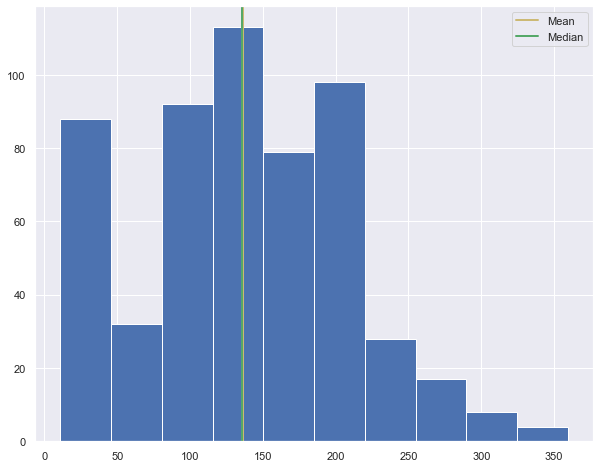

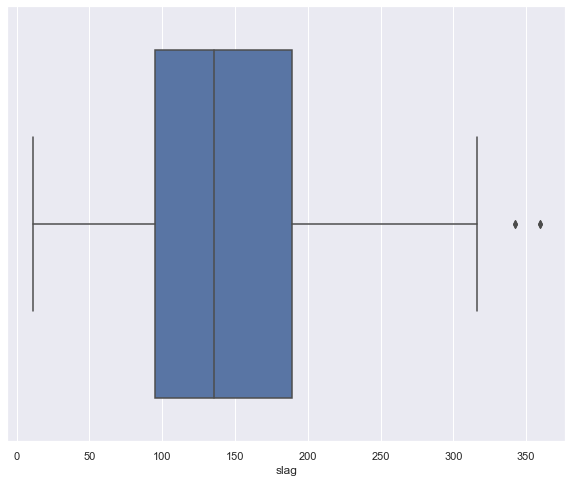

In [11]:
replace_zeros('slag', np.nan)

print_summary(data['slag'])

Distribution of `slag` has a very large right hand skew.

### Fly Ash (ash)

count    1030.000000
mean       54.188350
std        63.997004
min         0.000000
25%         0.000000
50%         0.000000
75%       118.300000
max       200.100000
Name: ash, dtype: float64

Unique values: 156


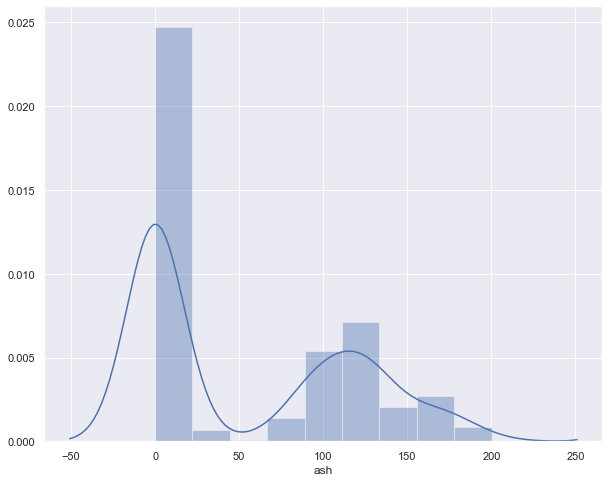

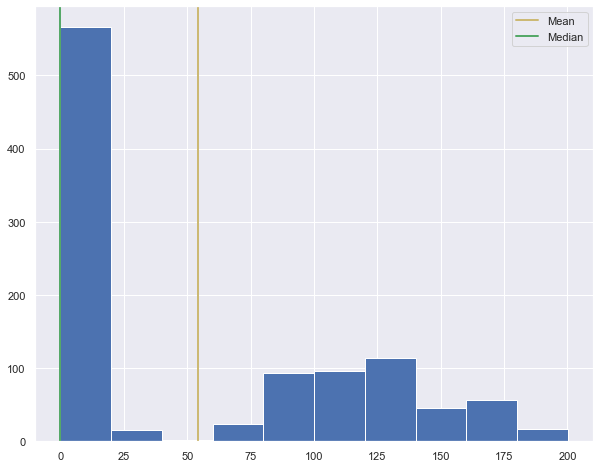

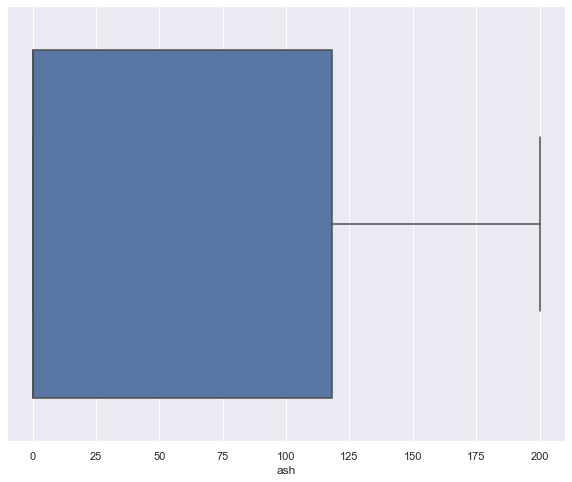

In [12]:
print_summary(raw_data['ash'])

Distribution of `ash` has a very strong right-hand skew, however this is largely due to most samples have no ash content.

***What does it look like if we only look at samples containing some ash?***

count    464.000000
mean     120.288793
std       33.675470
min       24.500000
25%       97.850000
50%      121.400000
75%      141.000000
max      200.100000
Name: ash, dtype: float64

Unique values: 155


/Users/phil/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/phil/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


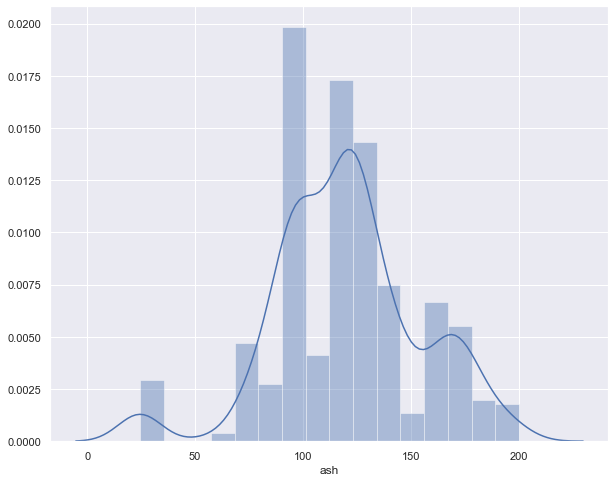

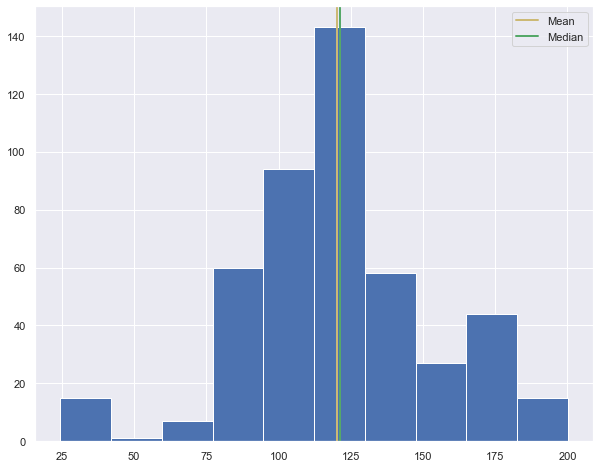

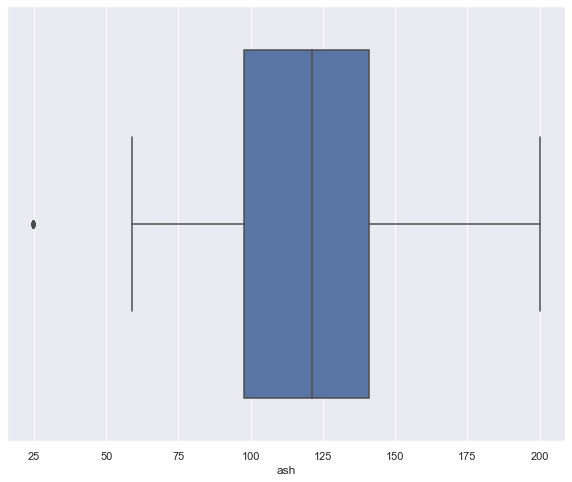

In [13]:
replace_zeros('ash', np.nan)

print_summary(data['ash'])

If we look at the distribution of `ash` in samples with non-zero levels of `ash`, we see a moderate left-hand skew.

### Water (water)

count    1030.000000
mean      181.567282
std        21.354219
min       121.800000
25%       164.900000
50%       185.000000
75%       192.000000
max       247.000000
Name: water, dtype: float64

Unique values: 195


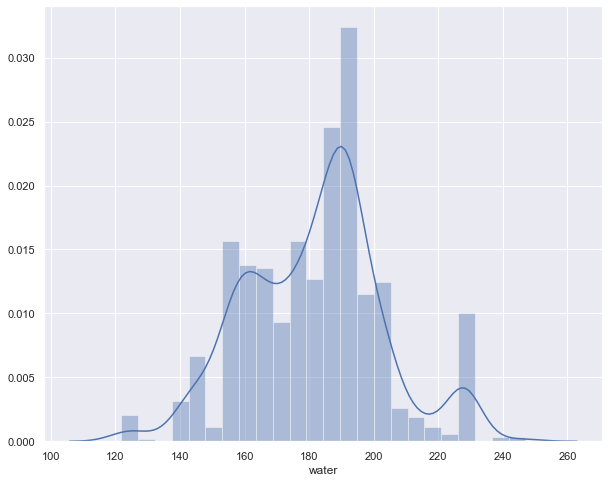

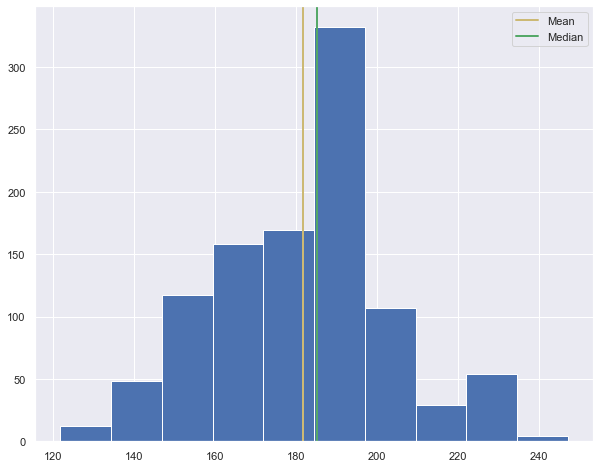

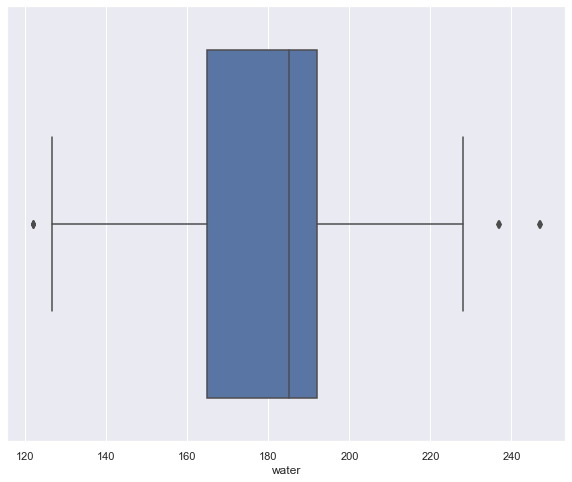

In [14]:
print_summary(raw_data['water'])

Distribution of `water` has a strong left-hand skew but also several large outliers.

### Superplasticizer (superplastic)

count    1030.000000
mean        6.204660
std         5.973841
min         0.000000
25%         0.000000
50%         6.400000
75%        10.200000
max        32.200000
Name: superplastic, dtype: float64

Unique values: 111


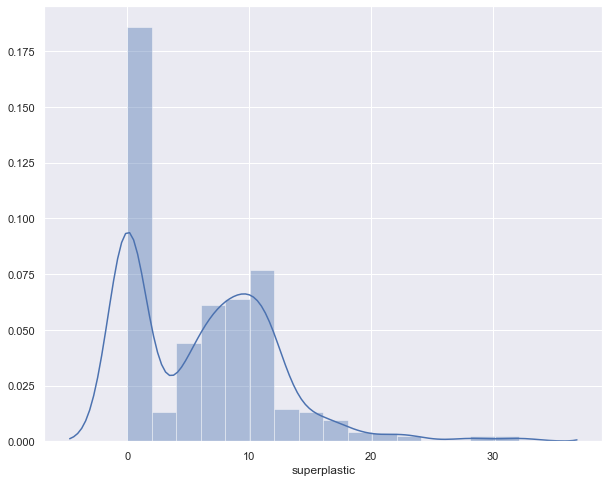

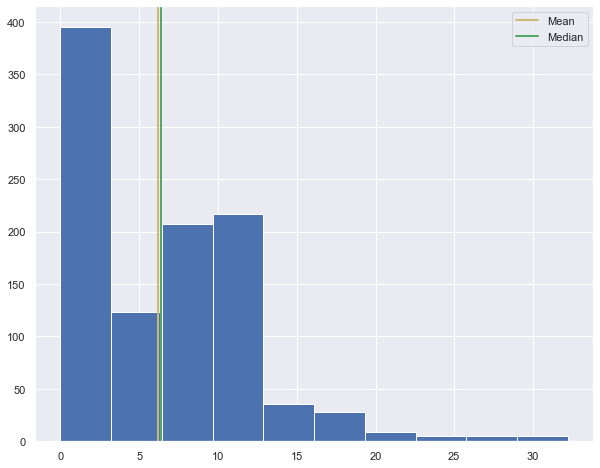

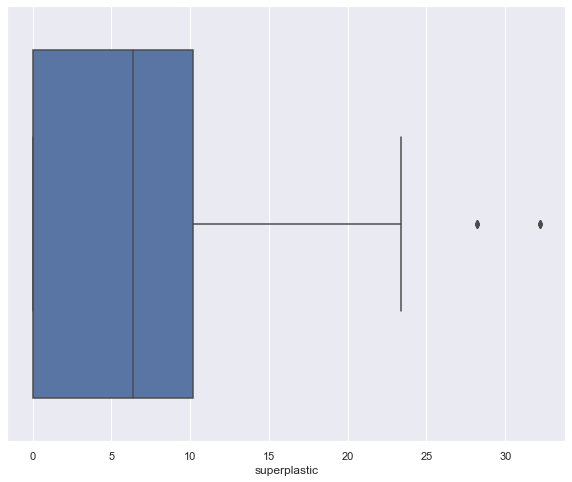

In [15]:
print_summary(raw_data['superplastic'])

Distribution of `superplastic` has a strong right skew with a few large outliers. It also has many 0-values so let's look at what the non-zero `superplastic` distribution looks like.

/Users/phil/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/phil/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


count    651.000000
mean       9.816897
std        4.580328
min        1.700000
25%        6.950000
50%        9.400000
75%       11.600000
max       32.200000
Name: superplastic, dtype: float64

Unique values: 110


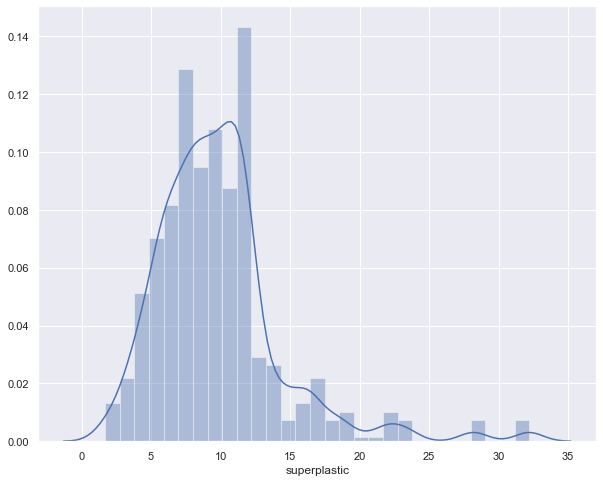

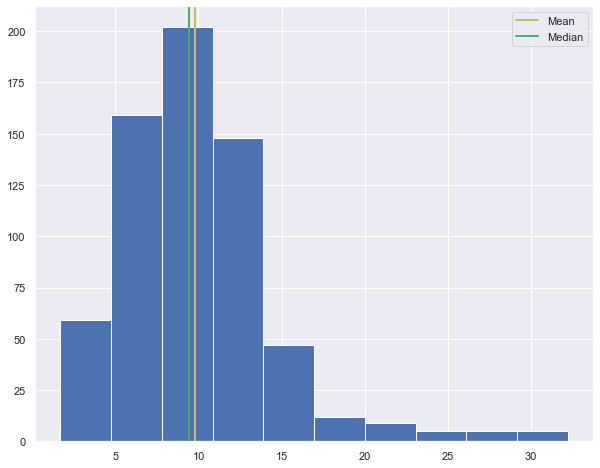

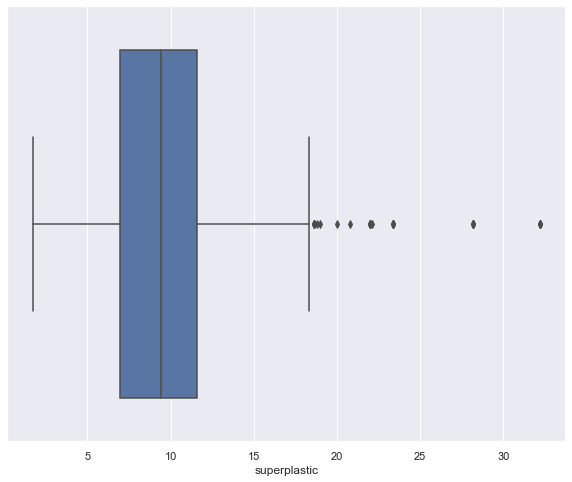

In [16]:
replace_zeros('superplastic', np.nan)

print_summary(data['superplastic'])

Looking at only non-zero `superplastic` values, we see a right-hand skew with several outliers.

### Coarse Aggregate (coarseagg)

count    1030.000000
mean      972.918932
std        77.753954
min       801.000000
25%       932.000000
50%       968.000000
75%      1029.400000
max      1145.000000
Name: coarseagg, dtype: float64

Unique values: 284


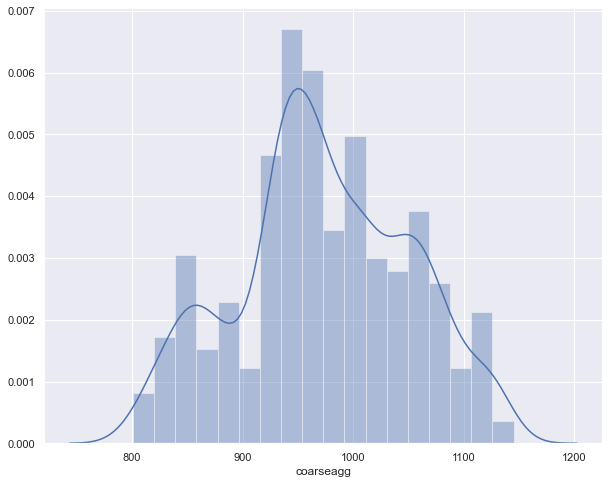

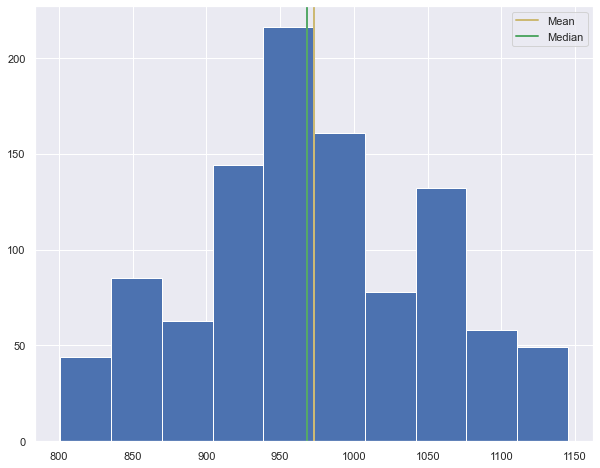

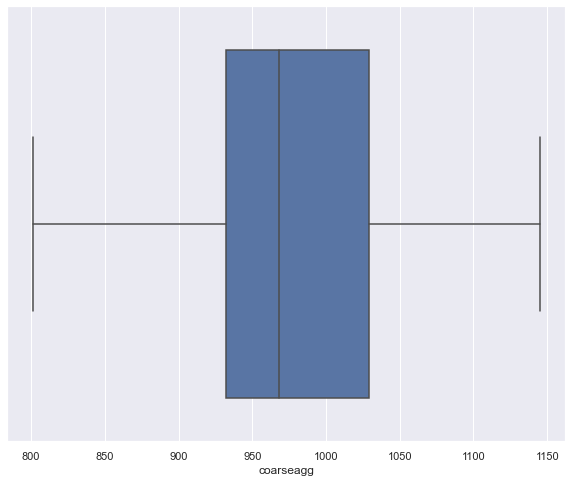

In [17]:
print_summary(raw_data['coarseagg'])

Distribution of `courseagg` has a slight right skew and no outliers.

### Fine Aggregate (fineagg)

count    1030.000000
mean      773.580485
std        80.175980
min       594.000000
25%       730.950000
50%       779.500000
75%       824.000000
max       992.600000
Name: fineagg, dtype: float64

Unique values: 302


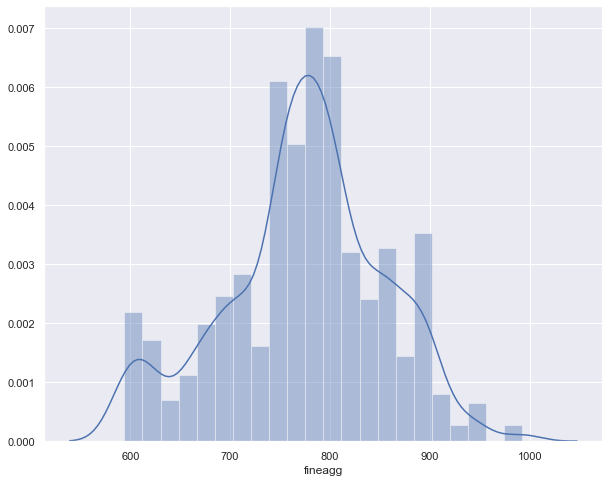

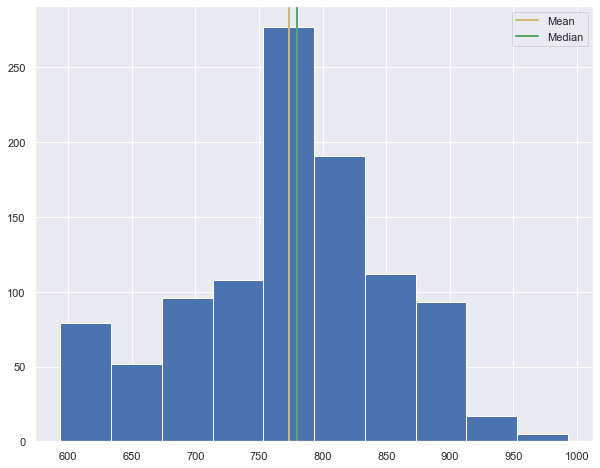

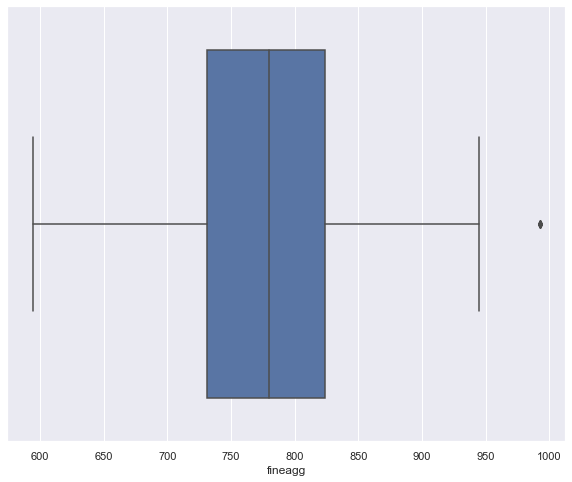

In [18]:
print_summary(raw_data['fineagg'])

Distribution of `fineagg` does not have a noticeable skew.

### Age (age)

count    1030.000000
mean       45.662136
std        63.169912
min         1.000000
25%         7.000000
50%        28.000000
75%        56.000000
max       365.000000
Name: age, dtype: float64

Unique values: 14


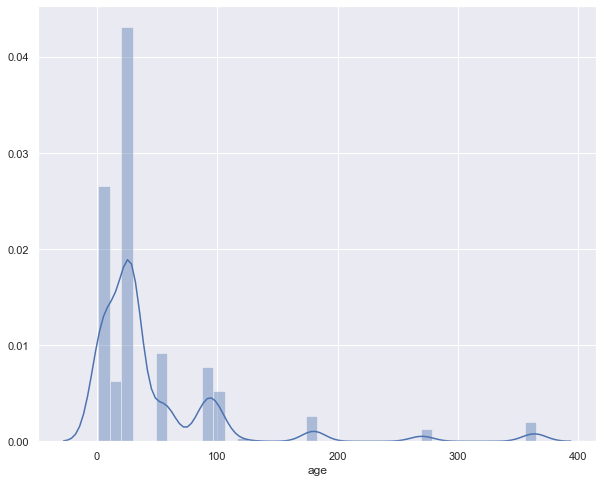

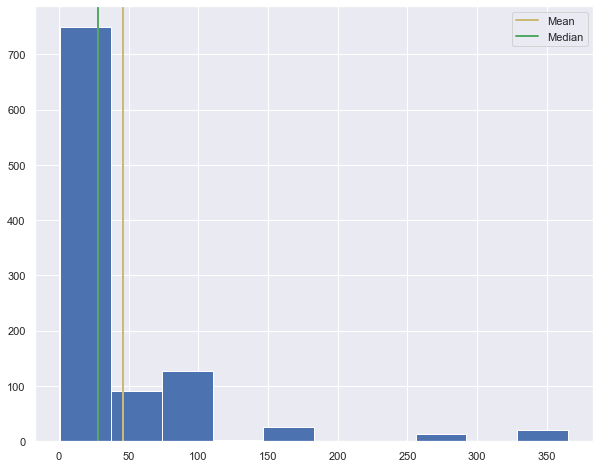

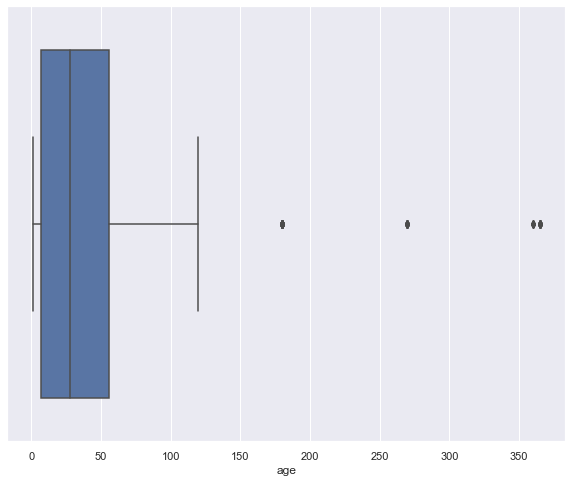

In [19]:
print_summary(raw_data['age'])

Distribution of `age` has a right skew with several large outliers for particularly older samples.

### Compressive Strength (strength)

count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: strength, dtype: float64

Unique values: 845


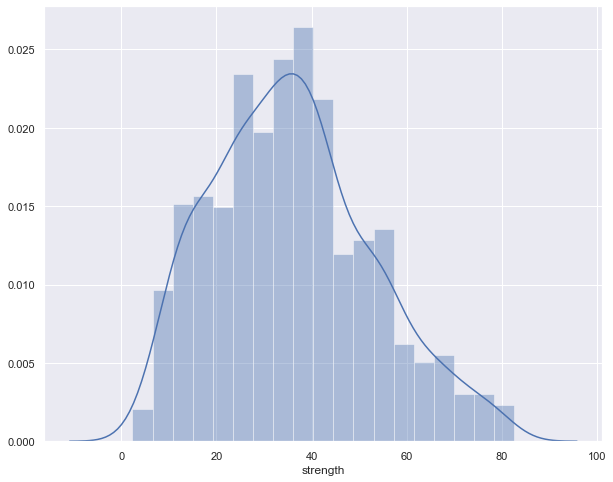

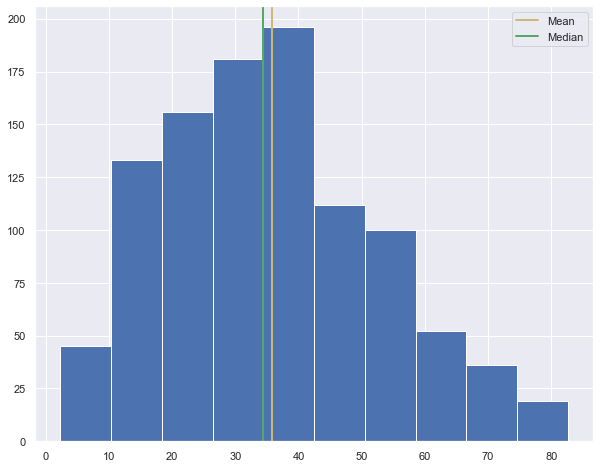

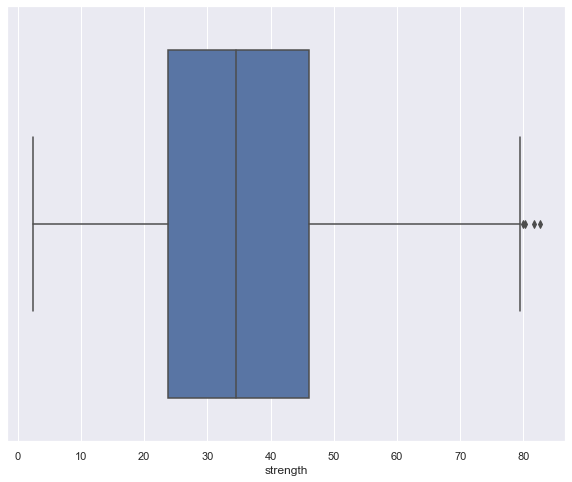

In [20]:
print_summary(raw_data['strength'])

Distribution of `strength` has a slight right skew with a few large outliers.

## Bivariate analyses

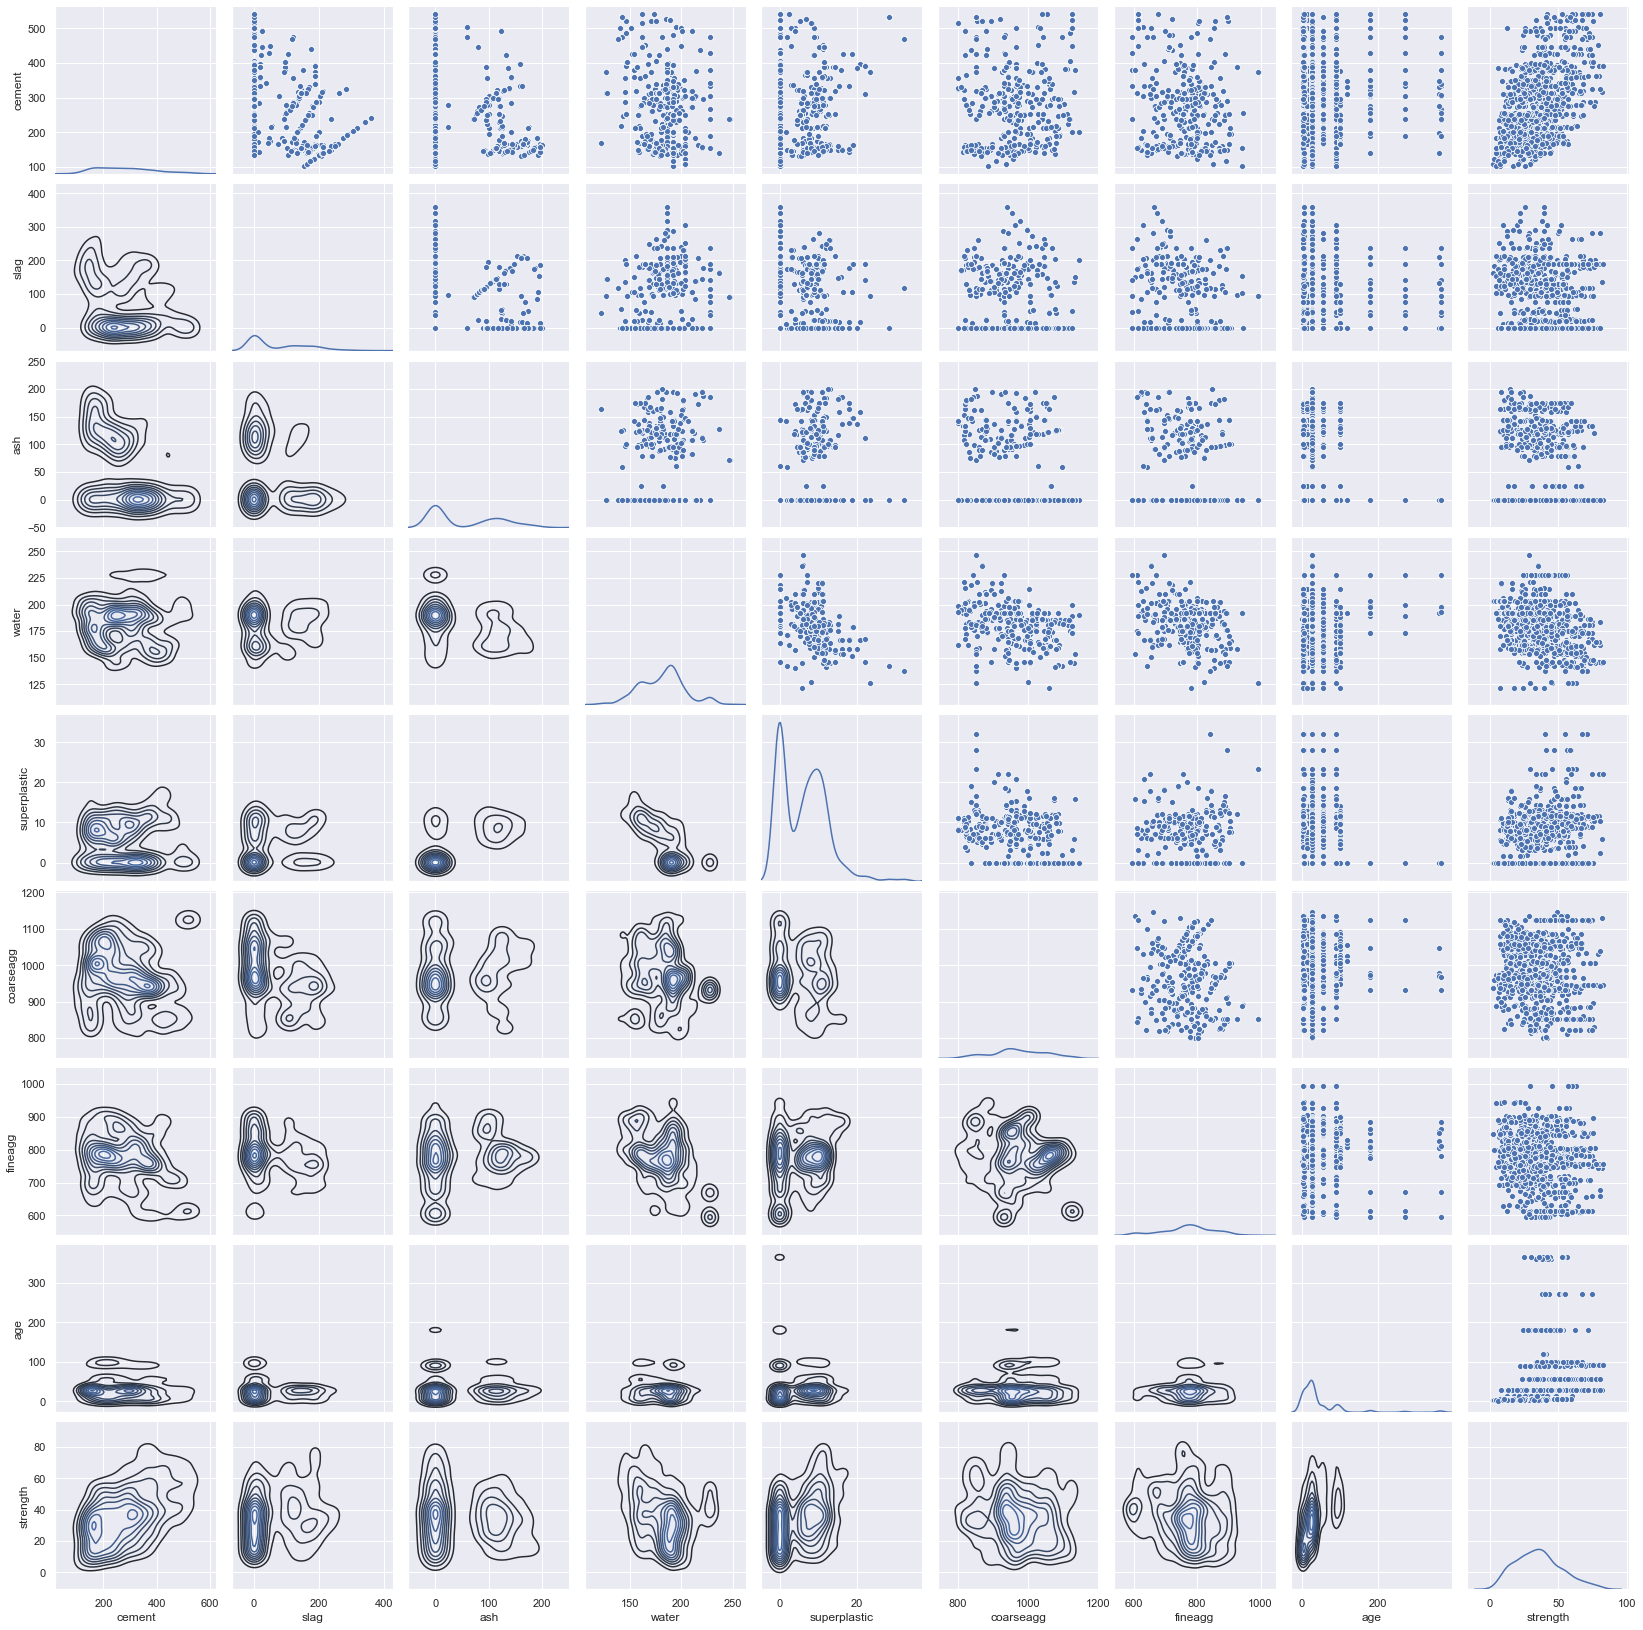

In [21]:
g = sns.PairGrid(raw_data);

g.map_upper(sns.scatterplot);
g.map_diag(sns.kdeplot);
g.map_lower(sns.kdeplot);

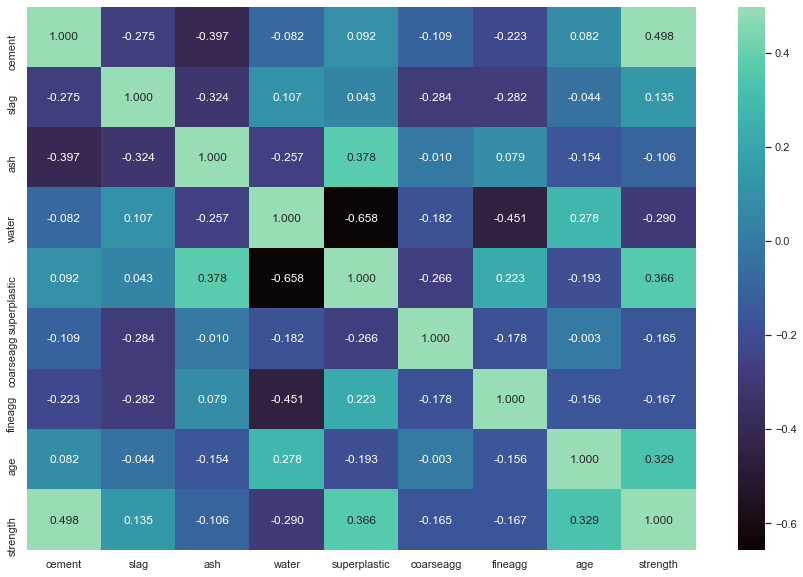

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(raw_data.corr(), annot=True, cmap='mako', vmin=-.658, vmax=.498, center=0, fmt='.3f');

With the raw data, the strongest positive correlations seem to be between (1) strength and cement content, (2) ash content and superplastic content, and (3) superplastic content and strength.

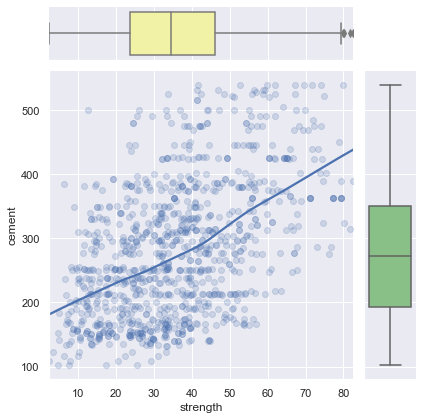

In [23]:
marginal_boxplot('strength', 'cement')

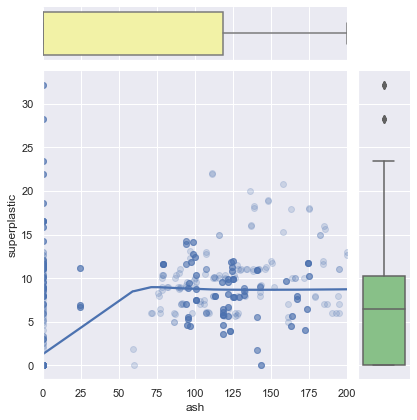

In [24]:
marginal_boxplot('ash', 'superplastic')

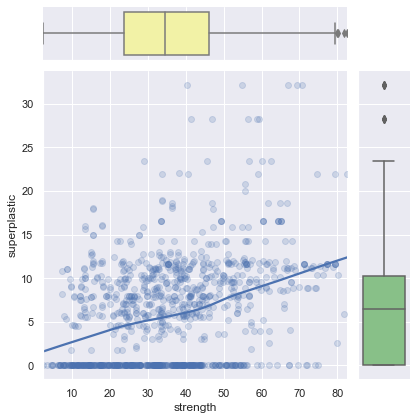

In [25]:
marginal_boxplot('strength', 'superplastic')

The strongest negative correlations seem to be between (1) superplastic content and water content, (2) fine aggregate content and water content, and (3) cement content and ash content.

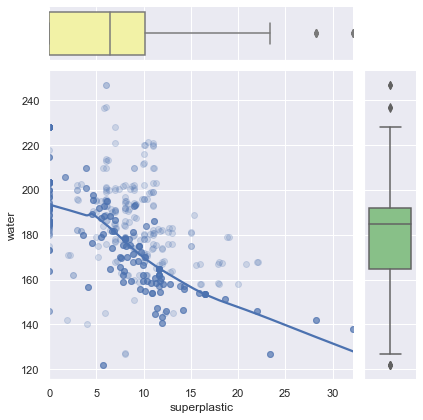

In [26]:
marginal_boxplot('superplastic', 'water')

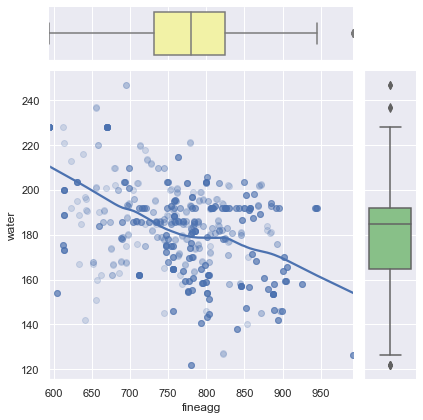

In [27]:
marginal_boxplot('fineagg', 'water')

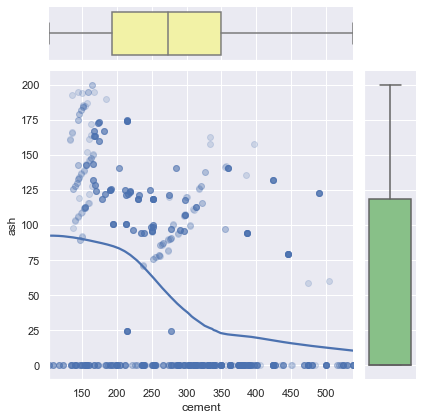

In [28]:
marginal_boxplot('cement', 'ash')

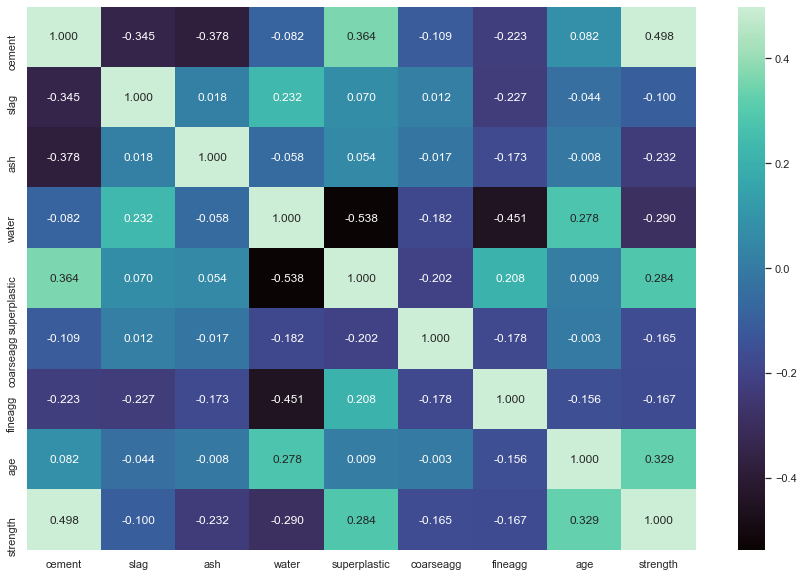

In [29]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap='mako', vmin=-.538, vmax=.498, center=0, fmt='.3f');

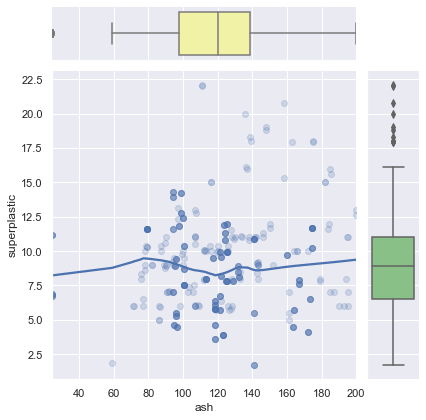

In [30]:
# Re-run the marginal boxplots for the non-zero values just to see if there is any significant difference
marginal_boxplot('ash', 'superplastic', raw=False)

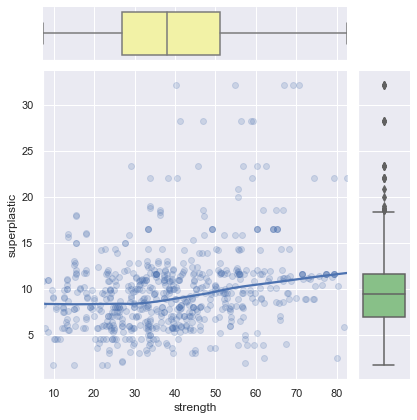

In [31]:
marginal_boxplot('strength', 'superplastic', raw=False)

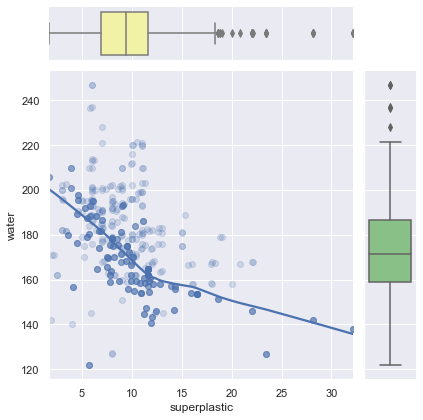

In [32]:
marginal_boxplot('superplastic', 'water', raw=False)

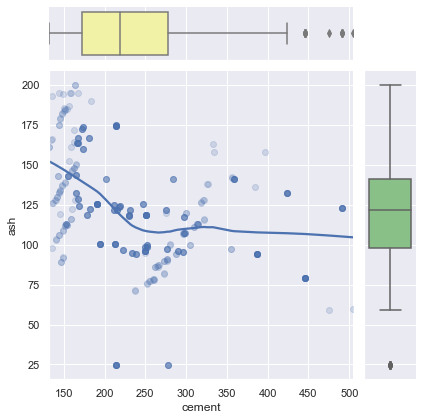

In [33]:
marginal_boxplot('cement', 'ash', raw=False)

There does not seem to be any significant change in correlation when we remove zero values from the raw data.

The strongest positive correlations are centered around cement content, superplastics content, and strength. Another is ash, which is positively correlated with superplastics but *negatively* correlated with strength. So what does the relationship between cement, superplastics, and ash look like?

For this we'll utilize a 3-dimensional scatterplot; one with the zero values, one without.

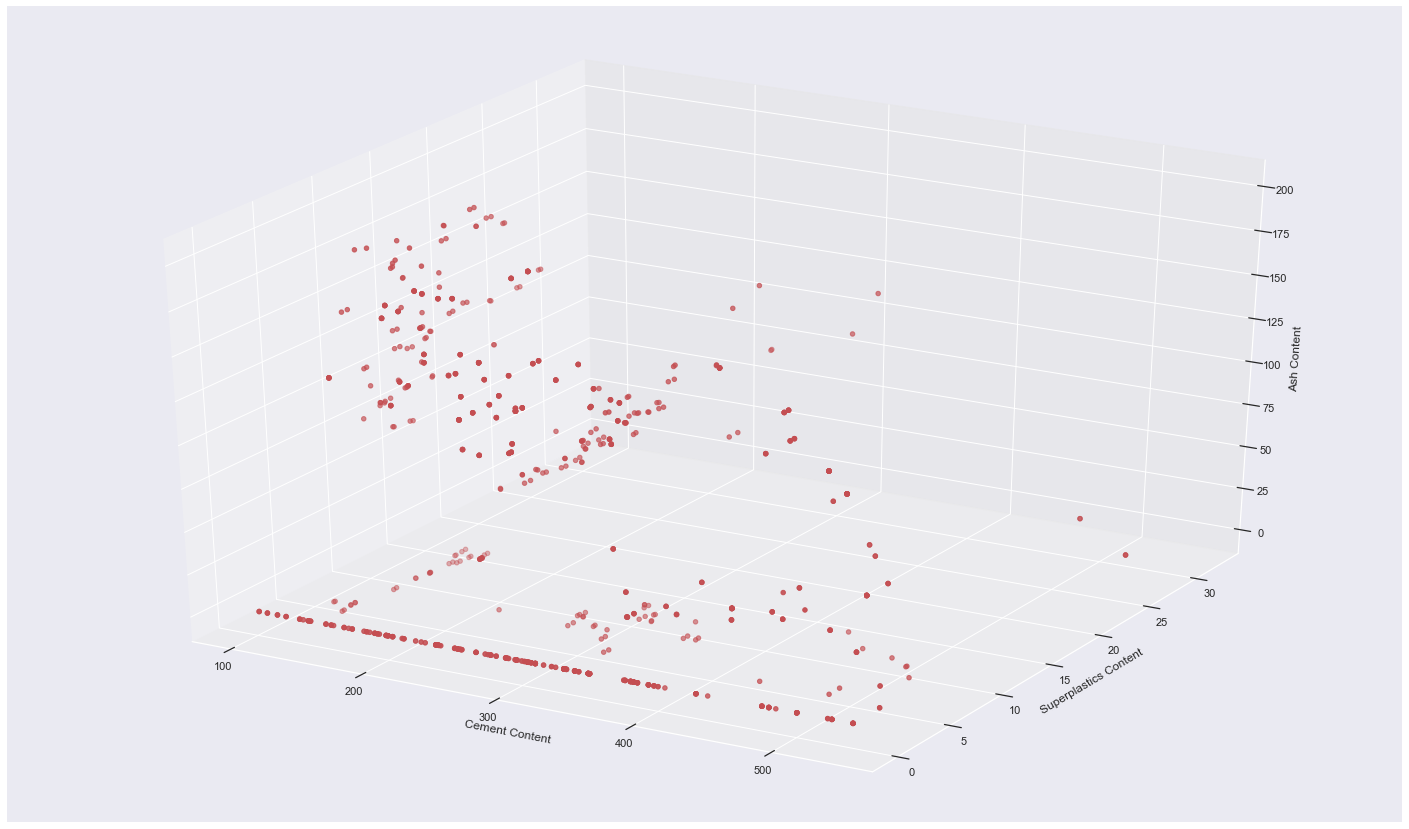

In [34]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(111, projection='3d')

x = raw_data['cement']
y = raw_data['superplastic']
z = raw_data['ash']

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Cement Content')
ax.set_ylabel('Superplastics Content')
ax.set_zlabel('Ash Content')

plt.show();

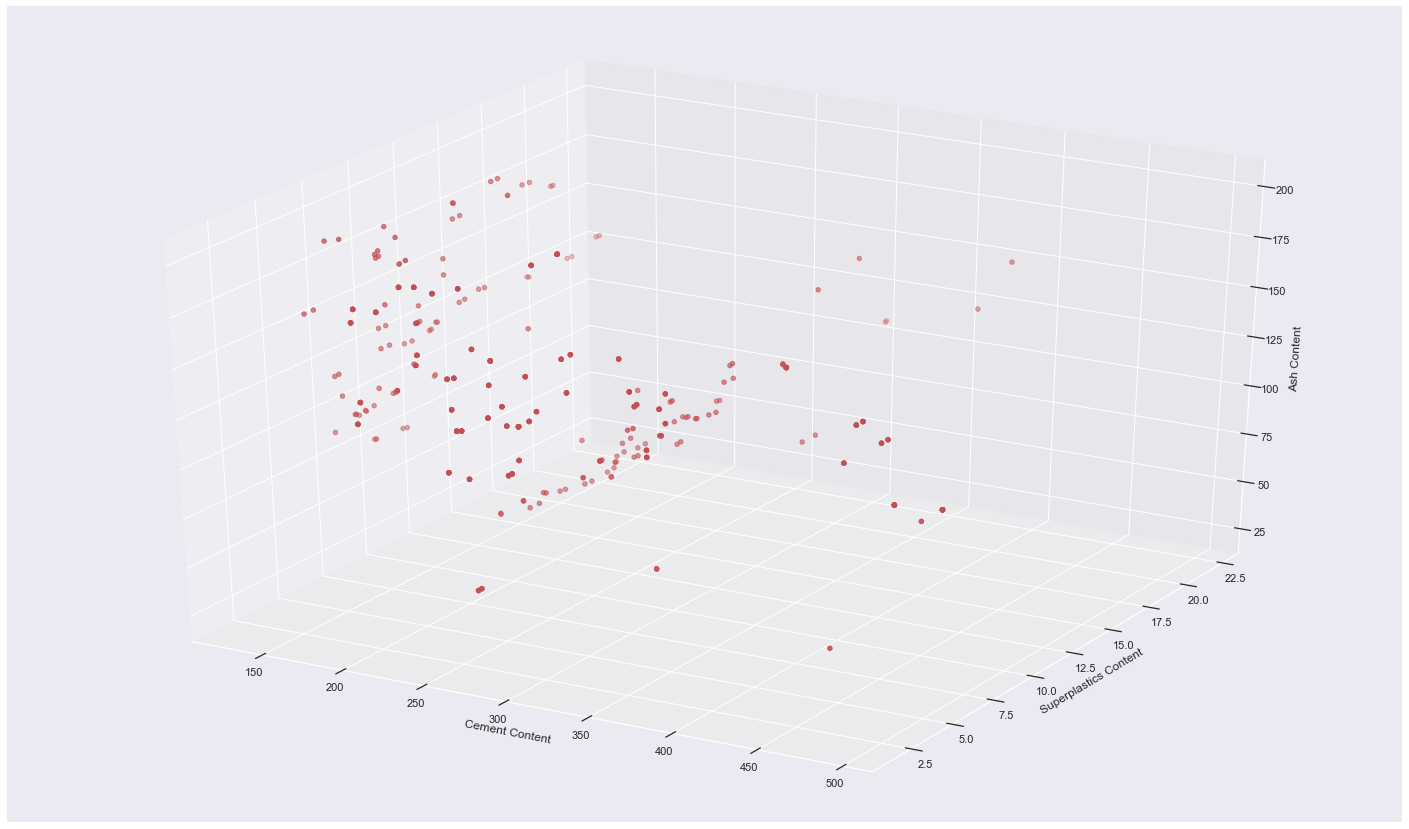

In [35]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(111, projection='3d')

x = data['cement']
y = data['superplastic']
z = data['ash']

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Cement Content')
ax.set_ylabel('Superplastics Content')
ax.set_zlabel('Ash Content')

plt.show();

## Feature Engineering Techniques

### Feature Extraction

In [36]:
raw_data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


One simple feature we can add is total aggregate content, which is just the sum of `coarseagg` and `fineagg`.

In [37]:
raw_data['agg'] = raw_data['coarseagg'] + raw_data['fineagg']
data['agg'] = data['coarseagg'] + data['fineagg']

In [38]:
raw_data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,agg
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,1720.3
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,1877.0
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,1818.1
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,1602.0
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1744.1


Additionally, since superplasticizers are synthetic compounds designed to reduce the required amount of water, perhaps we can get something useful out of the `water`:`superplastic` ratio?

In [39]:
raw_data['swr'] = raw_data['water'] / raw_data['superplastic']
data['swr'] = data['water'] / data['superplastic']

# This is more readable than superplastic:water, but we get inf when dividing by zero, so let's replace that with nan
raw_data['swr'].replace(np.inf, np.nan, inplace=True)
data['swr'].replace(np.inf, np.nan, inplace=True)

In [40]:
raw_data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,agg,swr
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,1720.3,NaN
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,1877.0,14.657407
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,1818.1,34.072727
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,1602.0,NaN
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1744.1,21.241758


Finally, maybe our model won't care **how much** of something was added, just that it was? So let's create a one-hot-esque column that is just a flag for whether or not that ingredient has been added.

In [41]:
# We don't need to do this for all columns, only those that have zero values
raw_data['contains_slag'] = raw_data['slag'] > 0
raw_data['contains_ash'] = raw_data['ash'] > 0
raw_data['contains_superplastic'] = raw_data['superplastic'] > 0

data['contains_slag'] = data['slag'] > 0
data['contains_ash'] = data['ash'] > 0
data['contains_superplastic'] = data['superplastic'] > 0

# Recast True/False as 1/0
raw_data['contains_slag'] = raw_data['contains_slag'].astype(int)
raw_data['contains_ash'] = raw_data['contains_ash'].astype(int)
raw_data['contains_superplastic'] = raw_data['contains_superplastic'].astype(int)

data['contains_slag'] = data['contains_slag'].astype(int)
data['contains_ash'] = data['contains_ash'].astype(int)
data['contains_superplastic'] = data['contains_superplastic'].astype(int)

In [42]:
raw_data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,agg,swr,contains_slag,contains_ash,contains_superplastic
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,1720.3,NaN,1,0,0
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,1877.0,14.657407,1,1,1
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,1818.1,34.072727,0,1,1
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,1602.0,NaN,1,0,0
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1744.1,21.241758,1,0,1


In [43]:
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,agg,swr,contains_slag,contains_ash,contains_superplastic
0,141.3,212.0,NaN,203.5,NaN,971.8,748.5,28,29.89,1720.3,NaN,1,0,0
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,1877.0,14.657407,1,1,1
2,250.0,NaN,95.7,187.4,5.5,956.9,861.2,28,29.22,1818.1,34.072727,0,1,1
3,266.0,114.0,NaN,228.0,NaN,932.0,670.0,28,45.85,1602.0,NaN,1,0,0
4,154.8,183.4,NaN,193.3,9.1,1047.4,696.7,28,18.29,1744.1,21.241758,1,0,1


### Train/Test Split

*I also want to include a validation set, so am going with 70% train, 10% validate, 20% test*

In [44]:
# LinearRegression doesn't like np.nan, so we'll use raw_data
# and replace swr nan's with 0

raw_data['swr'].replace(np.nan, 0, inplace=True)
x = raw_data.drop('strength', axis=1)
y = raw_data[['strength']]

In [45]:
train_ratio = .7
valid_ratio = .1
test_ratio = .2

x_train, x_test, y_train, y_test = tts(x, y, test_size=1-train_ratio, random_state=1)

#x_train, x_test, y_train, y_test = tts(x, y, test_size=1-train_ratio, random_state=1)
#x_val, x_test, y_val, y_test = tts(x_test, y_test, test_size=test_ratio/(test_ratio+valid_ratio), random_state=1)

In [46]:
simple_linear_regression = LinearRegression()
simple_linear_regression.fit(x_train, y_train)

LinearRegression()

In [47]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}.".format(col_name, simple_linear_regression.coef_[0][idx]))

The coefficient for cement is 0.11411851032308984.
The coefficient for slag is 0.0886246888240249.
The coefficient for ash is 0.015494339318093343.
The coefficient for water is -0.1260184282008129.
The coefficient for superplastic is -0.5300383276953631.
The coefficient for coarseagg is 818789528842.1881.
The coefficient for fineagg is 818789528842.1982.
The coefficient for age is 0.1141598653445305.
The coefficient for agg is -818789528842.1746.
The coefficient for swr is -0.11369922898004697.
The coefficient for contains_slag is -0.05722979299054391.
The coefficient for contains_ash is 1.7396467070143116.
The coefficient for contains_superplastic is 18.73162969685704.


In [48]:
intercept = simple_linear_regression.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -25.35044444444444


In [49]:
simple_linear_regression.score(x_train, y_train)

0.6452783220176914

In [50]:
simple_linear_regression.score(x_test, y_test)

0.6488771094472509

Clearly with a dataset this complicated, linear regression isn't going to cut it. Let's see if a decision tree performs any better.

In [51]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from IPython.display import Image
from os import system

dt = DecisionTreeRegressor(random_state=1)
dt.fit(x_train, y_train)

DecisionTreeRegressor(random_state=1)

In [52]:
dt.score(x_train, y_train)

0.9948546724953878

In [53]:
dt.score(x_test, y_test)

0.8468443061264576

In [54]:
pd.DataFrame(dt.feature_importances_, columns=['Imp'], index=x_train.columns)

,Imp
cement,0.344124
slag,0.089350
ash,0.019093
water,0.118810
superplastic,0.011971
coarseagg,0.025242
fineagg,0.006602
age,0.337260
agg,0.036446
swr,0.009485


Much better performance than linear, but how much better will RF perform?

In [55]:
from sklearn.ensemble import RandomForestRegressor

# max_features=8 gives us the best test score of 90.92
rf = RandomForestRegressor(n_estimators=50, random_state=1, max_features=8)
rf = rf.fit(x_train, y_train.values.ravel())

In [56]:
rf.score(x_train, y_train)

0.9825521458842333

In [57]:
rf.score(x_test, y_test)

0.9092494871124585

**MinMaxScaler, you idiot**

In [70]:
import re
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

df_columns = raw_data.columns.drop('strength')
scaler = MinMaxScaler()
df = scaler.fit_transform(raw_data.drop('strength', axis=1))

df = pd.DataFrame(df)
df.columns = df_columns
df['strength'] = raw_data['strength']

df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,agg,swr,contains_slag,contains_ash,contains_superplastic,strength
0,0.089726,0.589872,0.000000,0.652556,0.000000,0.496512,0.387607,0.074176,0.513255,0.000000,1.0,0.0,0.0,29.89
1,0.152740,0.117418,0.621189,0.291534,0.335404,0.813372,0.507275,0.035714,0.818713,0.120959,1.0,1.0,1.0,23.51
2,0.337900,0.000000,0.478261,0.523962,0.170807,0.453198,0.670346,0.074176,0.703899,0.281183,0.0,1.0,1.0,29.22
3,0.374429,0.317195,0.000000,0.848243,0.000000,0.380814,0.190667,0.074176,0.282651,0.000000,1.0,0.0,0.0,45.85
4,0.120548,0.510295,0.000000,0.571086,0.282609,0.716279,0.257652,0.074176,0.559649,0.175296,1.0,0.0,1.0,18.29


In [123]:
x = df.drop('strength', axis=1)
y = df[['strength']]
x_train, x_test, y_train, y_test = tts(x, y, test_size=1-train_ratio, random_state=1)

rf2 = RandomForestRegressor(n_estimators=50, max_features=6, random_state=1)
rf2 = rf2.fit(x_train, y_train.values.ravel())

rf2.score(x_train, y_train)
rf2.score(x_test, y_test)

0.9823060210054341

0.9066611757436729

Utilizing `MinMaxScaler()` gives us nearly identical performance, but only using 6 features instead of 8.

In [124]:
from sklearn.model_selection import cross_validate

cv = cross_validate(rf2, x, y.values.ravel(), cv=10)
cv['test_score']

array([0.90613932, 0.89243887, 0.95712159, 0.92652357, 0.87029082,
       0.93760206, 0.93783703, 0.9217413 , 0.92392217, 0.92855661])

In [126]:
cv['test_score'].mean()
cv['test_score'].std()

0.9202173350326938

0.02358486144379121

With a 10-fold cross validation on our random forest regressor we've achieved 92.02% accurracy in determining cement strength.

Will other models do better?

**GradientBoostingRegressor**

In [149]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

gbr = GradientBoostingRegressor()
gbr = gbr.fit(x_train, y_train.values.ravel())

In [146]:
gbr.score(x_train, y_train)
gbr.score(x_test, y_test)

0.9478008630339665

0.8949099068630435